Paso 1: Preparar el Entorno
Antes de comenzar, asegúrate de tener instaladas las librerías necesarias:

In [17]:
# Paso 1: Importar las librerías necesarias
import openai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Paso 2: Importar las Librerías

In [18]:
# Paso 2: Configurar la clave de API de OpenAI
openai.api_key = 'TU_CLAVE_DE_API_DE_OPENAI'

In [19]:
# Crear una lista de diccionarios con los datos de los tweets (ejemplo con 5 tweets por brevedad)
tweets_data = [
    {'Usuario': '@MariaTech', 'Fecha y Hora': '2023-10-01 08:15 AM', 'Tweet': 'La IA está revolucionando la medicina. ¡Es increíble cómo puede ayudar en diagnósticos más rápidos!'},
    {'Usuario': '@PedroOpiniones', 'Fecha y Hora': '2023-10-01 09:30 AM', 'Tweet': 'Preocupado por mi trabajo. ¿La IA reemplazará a los contadores en el futuro?'},
    {'Usuario': '@Ana_López', 'Fecha y Hora': '2023-10-01 10:05 AM', 'Tweet': 'La automatización nos liberará de tareas repetitivas. Más tiempo para la creatividad.'},
    {'Usuario': '@CarlosG', 'Fecha y Hora': '2023-10-01 10:45 AM', 'Tweet': 'No confío en que las máquinas hagan el trabajo de los humanos. ¿Dónde queda el toque personal?'},
    {'Usuario': '@Sofia_Innova', 'Fecha y Hora': '2023-10-01 11:20 AM', 'Tweet': 'Aprendiendo sobre IA y su impacto en la educación. ¡Los estudiantes podrán aprender a su propio ritmo!'},
    {'Usuario': '@MariaTech', 'Fecha y Hora': '2023-10-01 08:15 AM', 'Tweet': 'La IA está revolucionando la medicina. ¡Es increíble cómo puede ayudar en diagnósticos más rápidos!'},
    {'Usuario': '@PedroOpiniones', 'Fecha y Hora': '2023-10-01 09:30 AM', 'Tweet': 'Preocupado por mi trabajo. ¿La IA reemplazará a los contadores en el futuro?'},
    {'Usuario': '@Ana_López', 'Fecha y Hora': '2023-10-01 10:05 AM', 'Tweet': 'La automatización nos liberará de tareas repetitivas. Más tiempo para la creatividad.'},
    {'Usuario': '@CarlosG', 'Fecha y Hora': '2023-10-01 10:45 AM', 'Tweet': 'No confío en que las máquinas hagan el trabajo de los humanos. ¿Dónde queda el toque personal?'},
    {'Usuario': '@Sofia_Innova', 'Fecha y Hora': '2023-10-01 11:20 AM', 'Tweet': 'Aprendiendo sobre IA y su impacto en la educación. ¡Los estudiantes podrán aprender a su propio ritmo!'},
    {'Usuario': '@JuanPerez', 'Fecha y Hora': '2023-10-01 12:00 PM', 'Tweet': 'La IA es solo una moda pasajera. Siempre necesitaremos humanos en la industria.'},
    {'Usuario': '@LauraTech', 'Fecha y Hora': '2023-10-01 12:40 PM', 'Tweet': 'Emocionada por las oportunidades que la IA traerá al campo de la ingeniería.'},
    {'Usuario': '@MiguelSanchez', 'Fecha y Hora': '2023-10-01 01:15 PM', 'Tweet': 'La pérdida de empleos por la IA es una realidad que no podemos ignorar.'},
    {'Usuario': '@Elena_P', 'Fecha y Hora': '2023-10-01 01:50 PM', 'Tweet': 'Con la IA, podríamos tener diagnósticos médicos más precisos. ¡Es un avance enorme!'},
    {'Usuario': '@Luis_R', 'Fecha y Hora': '2023-10-01 02:25 PM', 'Tweet': '¿Y si la IA crea más desigualdad laboral? No todos tienen acceso a estas tecnologías.'},
    {'Usuario': '@PatriciaM', 'Fecha y Hora': '2023-10-01 03:00 PM', 'Tweet': 'La educación debe adaptarse. Necesitamos preparar a las nuevas generaciones para trabajos que aún no existen.'},
    {'Usuario': '@Roberto_G', 'Fecha y Hora': '2023-10-01 03:35 PM', 'Tweet': 'La IA en la agricultura podría aumentar la producción y reducir el hambre.'},
    {'Usuario': '@LuciaDiaz', 'Fecha y Hora': '2023-10-01 04:10 PM', 'Tweet': 'Preocupada por el futuro de los artistas. ¿La IA puede crear arte mejor que los humanos?'},
    {'Usuario': '@FernandoH', 'Fecha y Hora': '2023-10-01 04:45 PM', 'Tweet': 'Las empresas solo piensan en reducir costos con IA, no en el bienestar de sus empleados.'},
    {'Usuario': '@MonicaS', 'Fecha y Hora': '2023-10-01 05:20 PM', 'Tweet': 'La IA puede mejorar la atención al cliente con respuestas más rápidas y precisas.'},
    {'Usuario': '@DiegoInnov', 'Fecha y Hora': '2023-10-01 05:55 PM', 'Tweet': 'Hay que abrazar el cambio. La IA abrirá puertas a nuevas profesiones y oportunidades.'},
    {'Usuario': '@Carmen_R', 'Fecha y Hora': '2023-10-01 06:30 PM', 'Tweet': 'No creo que las máquinas puedan reemplazar la empatía humana en trabajos sociales.'},
    {'Usuario': '@JavierTech', 'Fecha y Hora': '2023-10-01 07:05 PM', 'Tweet': 'La programación y el desarrollo de IA serán habilidades esenciales en el futuro laboral.'},
    {'Usuario': '@NataliaM', 'Fecha y Hora': '2023-10-01 07:40 PM', 'Tweet': 'La IA en logística hará que las entregas sean más rápidas y eficientes.'},
    {'Usuario': '@AndresGonz', 'Fecha y Hora': '2023-10-01 08:15 PM', 'Tweet': 'Me preocupa que la IA tome decisiones importantes sin supervisión humana.'},
    {'Usuario': '@Valeria_Innova', 'Fecha y Hora': '2023-10-01 08:50 PM', 'Tweet': 'La colaboración entre humanos y IA puede llevarnos a logros increíbles.'},
    {'Usuario': '@RicardoF', 'Fecha y Hora': '2023-10-01 09:25 PM', 'Tweet': 'Los empleos tradicionales están en riesgo. Es hora de reinventarse.'},
    {'Usuario': '@IsabelTech', 'Fecha y Hora': '2023-10-01 10:00 PM', 'Tweet': 'La IA puede ayudar en la detección temprana de fraudes financieros. ¡Gran herramienta!'},
    {'Usuario': '@GustavoS', 'Fecha y Hora': '2023-10-01 10:35 PM', 'Tweet': 'La deshumanización del trabajo es una consecuencia negativa de la IA.'},
    {'Usuario': '@Andrea_L', 'Fecha y Hora': '2023-10-01 11:10 PM', 'Tweet': 'Con la IA, las tareas peligrosas pueden ser realizadas por máquinas, salvando vidas.'},
    {'Usuario': '@SergioM', 'Fecha y Hora': '2023-10-01 11:45 PM', 'Tweet': 'La dependencia de la IA nos puede hacer perder habilidades esenciales.'},
    {'Usuario': '@MarianaC', 'Fecha y Hora': '2023-10-02 08:00 AM', 'Tweet': 'Necesitamos regulaciones claras sobre el uso de IA en el trabajo.'},
    {'Usuario': '@AlbertoH', 'Fecha y Hora': '2023-10-02 08:35 AM', 'Tweet': 'La IA en el sector legal puede agilizar procesos, pero ¿qué pasa con los abogados?'},
    {'Usuario': '@Teresa_Innova', 'Fecha y Hora': '2023-10-02 09:10 AM', 'Tweet': 'La IA es una herramienta, no un reemplazo. Depende de cómo la usemos.'},
    {'Usuario': '@DanielR', 'Fecha y Hora': '2023-10-02 09:45 AM', 'Tweet': 'Las máquinas no pueden comprender las emociones humanas. Siempre necesitaremos personas.'},
    {'Usuario': '@SoniaP', 'Fecha y Hora': '2023-10-02 10:20 AM', 'Tweet': 'La IA puede personalizar la educación según las necesidades de cada estudiante.'},
    {'Usuario': '@OscarTech', 'Fecha y Hora': '2023-10-02 10:55 AM', 'Tweet': 'El futuro es ahora. La IA está cambiando la industria automotriz con vehículos autónomos.'},
    {'Usuario': '@EvaMartinez', 'Fecha y Hora': '2023-10-02 11:30 AM', 'Tweet': 'Preocupada por la privacidad y los datos que maneja la IA en el trabajo.'},
    {'Usuario': '@FelipeG', 'Fecha y Hora': '2023-10-02 12:05 PM', 'Tweet': 'La eficiencia que aporta la IA puede llevar a jornadas laborales más cortas.'},
    {'Usuario': '@ClaudiaS', 'Fecha y Hora': '2023-10-02 12:40 PM', 'Tweet': 'La IA no tiene creatividad. Los humanos siempre seremos necesarios para innovar.'},
    {'Usuario': '@Ramon_Innova', 'Fecha y Hora': '2023-10-02 01:15 PM', 'Tweet': 'Las startups de IA están generando muchos empleos nuevos. ¡Es emocionante!'},
    {'Usuario': '@GloriaM', 'Fecha y Hora': '2023-10-02 01:50 PM', 'Tweet': 'No podemos confiar ciegamente en la IA. Necesitamos supervisión y control.'},
    {'Usuario': '@HectorSanchez', 'Fecha y Hora': '2023-10-02 02:25 PM', 'Tweet': 'La automatización ha existido siempre. La IA es solo el siguiente paso natural.'},
    {'Usuario': '@AliciaTech', 'Fecha y Hora': '2023-10-02 03:00 PM', 'Tweet': 'La IA puede ayudar en la traducción de idiomas, conectando más al mundo.'},
    {'Usuario': '@Pablo_R', 'Fecha y Hora': '2023-10-02 03:35 PM', 'Tweet': 'Las brechas de habilidades se ampliarán si no invertimos en educación sobre IA.'},
    {'Usuario': '@BeatrizL', 'Fecha y Hora': '2023-10-02 04:10 PM', 'Tweet': 'La IA en el sector salud puede reducir errores médicos. ¡Un gran avance!'},
    {'Usuario': '@EduardoG', 'Fecha y Hora': '2023-10-02 04:45 PM', 'Tweet': 'La dependencia tecnológica nos hace vulnerables. ¿Qué pasa si falla la IA?'},
    {'Usuario': '@Lucia_Innova', 'Fecha y Hora': '2023-10-02 05:20 PM', 'Tweet': 'La IA nos permite enfocarnos en tareas más estratégicas y menos en las rutinarias.'},
    {'Usuario': '@VictorM', 'Fecha y Hora': '2023-10-02 05:55 PM', 'Tweet': 'La ética en la IA es crucial. No podemos dejar que las máquinas decidan por sí solas.'},
    {'Usuario': '@SaraTech', 'Fecha y Hora': '2023-10-02 06:30 PM', 'Tweet': 'La IA está impulsando la innovación en energías renovables. ¡Gran noticia para el planeta!'},
    {'Usuario': '@ManuelD', 'Fecha y Hora': '2023-10-02 07:05 PM', 'Tweet': 'La pérdida de empleos es un costo muy alto. La IA debería ser regulada.'},
    {'Usuario': '@InesP', 'Fecha y Hora': '2023-10-02 07:40 PM', 'Tweet': 'Las posibilidades que ofrece la IA en investigación científica son infinitas.'},
    {'Usuario': '@Jorge_Innova', 'Fecha y Hora': '2023-10-02 08:15 PM', 'Tweet': 'Necesitamos adaptarnos y aprender nuevas habilidades para el futuro laboral con IA.'},
    {'Usuario': '@CamilaS', 'Fecha y Hora': '2023-10-02 08:50 PM', 'Tweet': 'La IA no tiene empatía. En trabajos que requieren trato humano, no puede reemplazarnos.'},
    {'Usuario': '@AdrianG', 'Fecha y Hora': '2023-10-02 09:25 PM', 'Tweet': 'Optimista sobre cómo la IA puede resolver problemas complejos que enfrentamos hoy.'},
    {'Usuario': '@Natalia_Innova', 'Fecha y Hora': '2023-10-02 10:00 PM', 'Tweet': 'La colaboración hombre-máquina es el camino a seguir. Juntos somos más fuertes.'},
    {'Usuario': '@MateoTech', 'Fecha y Hora': '2023-10-02 10:35 PM', 'Tweet': 'La IA puede predecir tendencias de mercado. ¡Una herramienta valiosa para inversores!'},
    {'Usuario': '@LuisaGonzalez', 'Fecha y Hora': '2023-10-02 11:10 PM', 'Tweet': 'La sobredependencia en la IA puede reducir nuestras habilidades cognitivas.'},
    {'Usuario': '@EnriqueS', 'Fecha y Hora': '2023-10-02 11:45 PM', 'Tweet': 'La IA en seguridad puede ayudar a prevenir delitos. ¡Gran avance para nuestras ciudades!'},
    {'Usuario': '@Paula_Innova', 'Fecha y Hora': '2023-10-03 08:00 AM', 'Tweet': 'Necesitamos fomentar la educación en IA desde temprana edad.'},
    {'Usuario': '@RafaelM', 'Fecha y Hora': '2023-10-03 08:35 AM', 'Tweet': 'Las máquinas carecen de conciencia. La toma de decisiones debería ser humana.'},
    {'Usuario': '@SilviaP', 'Fecha y Hora': '2023-10-03 09:10 AM', 'Tweet': 'La IA puede ayudar en la conservación del medio ambiente monitoreando ecosistemas.'},
    {'Usuario': '@TomasH', 'Fecha y Hora': '2023-10-03 09:45 AM', 'Tweet': 'Preocupado por la ética en el desarrollo de IA. ¿Quién regula esto?'},
    {'Usuario': '@VeronicaS', 'Fecha y Hora': '2023-10-03 10:20 AM', 'Tweet': 'La IA nos permitirá explorar el espacio más allá de lo que imaginamos.'},
    {'Usuario': '@Gabriel_Innova', 'Fecha y Hora': '2023-10-03 10:55 AM', 'Tweet': 'Los avances en IA son emocionantes. ¡El futuro se ve brillante!'},
    {'Usuario': '@LauraM', 'Fecha y Hora': '2023-10-03 11:30 AM', 'Tweet': 'La desigualdad puede aumentar si solo unos pocos tienen acceso a la IA.'},
    {'Usuario': '@DiegoTech', 'Fecha y Hora': '2023-10-03 12:05 PM', 'Tweet': 'La IA en el arte genera piezas impresionantes, pero ¿dónde queda la expresión humana?'},
    {'Usuario': '@MarisolR', 'Fecha y Hora': '2023-10-03 12:40 PM', 'Tweet': 'Las empresas deben responsabilizarse por el impacto social de implementar IA.'},
    {'Usuario': '@EstebanG', 'Fecha y Hora': '2023-10-03 01:15 PM', 'Tweet': 'La IA en deportes puede mejorar el rendimiento de los atletas con análisis detallados.'},
    {'Usuario': '@Patricia_Innova', 'Fecha y Hora': '2023-10-03 01:50 PM', 'Tweet': 'La colaboración interdisciplinaria es clave en el desarrollo de IA.'},
    {'Usuario': '@LuisM', 'Fecha y Hora': '2023-10-03 02:25 PM', 'Tweet': 'La falta de regulación en IA es preocupante. Necesitamos leyes actualizadas.'},
    {'Usuario': '@CarmenS', 'Fecha y Hora': '2023-10-03 03:00 PM', 'Tweet': 'La IA puede ayudar en traducción en tiempo real. ¡Comunicación sin barreras!'},
    {'Usuario': '@GonzaloTech', 'Fecha y Hora': '2023-10-03 03:35 PM', 'Tweet': 'La ciberseguridad es más importante que nunca con la IA en juego.'},
    {'Usuario': '@Elena_Innova', 'Fecha y Hora': '2023-10-03 04:10 PM', 'Tweet': 'La IA permitirá avances médicos que salvarán vidas. ¡Es esperanzador!'},
    {'Usuario': '@MiguelR', 'Fecha y Hora': '2023-10-03 04:45 PM', 'Tweet': 'La creatividad humana es insustituible. La IA es una herramienta, no un creador.'},
    {'Usuario': '@LuciaG', 'Fecha y Hora': '2023-10-03 05:20 PM', 'Tweet': 'La pérdida de empleos es inevitable, pero debemos enfocarnos en la reeducación.'},
    {'Usuario': '@Alberto_Innova', 'Fecha y Hora': '2023-10-03 05:55 PM', 'Tweet': 'La IA en logística reduce tiempos y costos. ¡Eficiencia al máximo!'},
    {'Usuario': '@MonicaM', 'Fecha y Hora': '2023-10-03 06:30 PM', 'Tweet': 'La privacidad de datos es un gran reto en la era de la IA.'},
    {'Usuario': '@RicardoS', 'Fecha y Hora': '2023-10-03 07:05 PM', 'Tweet': 'La IA puede ayudar en la detección temprana de enfermedades mentales.'},
    {'Usuario': '@Sofia_Innova', 'Fecha y Hora': '2023-10-03 07:40 PM', 'Tweet': 'Las nuevas tecnologías siempre generan miedo, pero también oportunidades.'},
    {'Usuario': '@DanielaP', 'Fecha y Hora': '2023-10-03 08:15 PM', 'Tweet': 'La IA no tiene moral. Debemos ser cuidadosos con cómo la programamos.'},
    {'Usuario': '@AndresTech', 'Fecha y Hora': '2023-10-03 08:50 PM', 'Tweet': 'La automatización de procesos gracias a la IA aumentará la productividad.'},
    {'Usuario': '@Claudia_Innova', 'Fecha y Hora': '2023-10-03 09:25 PM', 'Tweet': 'La IA en la música crea composiciones interesantes, pero sin alma humana.'},
    {'Usuario': '@FernandoM', 'Fecha y Hora': '2023-10-03 10:00 PM', 'Tweet': 'La dependencia tecnológica nos hace vulnerables a fallos masivos.'},
    {'Usuario': '@ValentinaS', 'Fecha y Hora': '2023-10-03 10:35 PM', 'Tweet': 'La IA puede ser una aliada en la lucha contra el cambio climático.'},
    {'Usuario': '@JoseLuisG', 'Fecha y Hora': '2023-10-03 11:10 PM', 'Tweet': 'La ética en IA debe ser prioridad. No podemos ignorar sus implicaciones.'},
    {'Usuario': '@Gabriela_Innova', 'Fecha y Hora': '2023-10-03 11:45 PM', 'Tweet': 'Emocionada por cómo la IA transformará la enseñanza personalizada.'},
    {'Usuario': '@PabloM', 'Fecha y Hora': '2023-10-04 08:00 AM', 'Tweet': 'La IA en finanzas puede prevenir crisis al analizar grandes volúmenes de datos.'},
    {'Usuario': '@Mariana_Innova', 'Fecha y Hora': '2023-10-04 08:35 AM', 'Tweet': 'Las oportunidades laborales en el campo de la IA están creciendo rápidamente.'},
    {'Usuario': '@RobertoS', 'Fecha y Hora': '2023-10-04 09:10 AM', 'Tweet': 'Preocupado por el sesgo que pueda tener la IA. ¿Cómo lo controlamos?'},
    {'Usuario': '@AngelaG', 'Fecha y Hora': '2023-10-04 09:45 AM', 'Tweet': 'La IA facilita la vida, pero no debemos perder habilidades básicas.'},
    {'Usuario': '@Victor_Innova', 'Fecha y Hora': '2023-10-04 10:20 AM', 'Tweet': 'La colaboración global es posible gracias a la IA y la tecnología.'},
    {'Usuario': '@IsabelM', 'Fecha y Hora': '2023-10-04 10:55 AM', 'Tweet': 'La IA en el hogar hace nuestras vidas más cómodas, pero ¿a qué costo?'},
    {'Usuario': '@JuanCarlosR', 'Fecha y Hora': '2023-10-04 11:30 AM', 'Tweet': 'La falta de empleo por la IA puede generar conflictos sociales.'},
    {'Usuario': '@Teresa_Innova', 'Fecha y Hora': '2023-10-04 12:05 PM', 'Tweet': 'La IA puede ayudar en la planificación urbana inteligente.'},
    {'Usuario': '@DiegoS', 'Fecha y Hora': '2023-10-04 12:40 PM', 'Tweet': 'La singularidad tecnológica es un concepto que me asusta. ¿Hasta dónde llegaremos?'},
    {'Usuario': '@LuciaM', 'Fecha y Hora': '2023-10-04 01:15 PM', 'Tweet': 'La IA en el cine y entretenimiento crea experiencias más inmersivas.'},
    {'Usuario': '@Felipe_Innova', 'Fecha y Hora': '2023-10-04 01:50 PM', 'Tweet': 'La educación es clave para adaptarnos a los cambios que trae la IA.'},
    {'Usuario': '@AnaS', 'Fecha y Hora': '2023-10-04 02:25 PM', 'Tweet': 'La IA puede ayudar a democratizar el acceso a la información.'},
    {'Usuario': '@Gustavo_Innova', 'Fecha y Hora': '2023-10-04 03:00 PM', 'Tweet': 'Las posibilidades de la IA en investigación científica son enormes.'},
    {'Usuario': '@ElenaG', 'Fecha y Hora': '2023-10-04 03:35 PM', 'Tweet': 'La falta de interacción humana en servicios automatizados me hace sentir aislada.'},
    {'Usuario': '@MarioS', 'Fecha y Hora': '2023-10-04 04:10 PM', 'Tweet': 'La IA puede mejorar la eficiencia energética en industrias.'},
    {'Usuario': '@Carmen_Innova', 'Fecha y Hora': '2023-10-04 04:45 PM', 'Tweet': 'La responsabilidad social en el desarrollo de IA es indispensable.'},
    {'Usuario': '@LuisR', 'Fecha y Hora': '2023-10-04 05:20 PM', 'Tweet': 'Las máquinas no pueden reemplazar la intuición humana en los negocios.'},
    {'Usuario': '@Natalia_Innova', 'Fecha y Hora': '2023-10-04 05:55 PM', 'Tweet': 'La IA en el sector rural puede optimizar la agricultura y ganadería.'},
    {'Usuario': '@EduardoM', 'Fecha y Hora': '2023-10-04 06:30 PM', 'Tweet': 'La automatización puede reducir costos, pero también empleos. Dilema complicado.'},
    {'Usuario': '@SofiaS', 'Fecha y Hora': '2023-10-04 07:05 PM', 'Tweet': 'La creatividad y la innovación humana son el motor del progreso, no las máquinas.'},
    {'Usuario': '@Jorge_Innova', 'Fecha y Hora': '2023-10-04 07:40 PM', 'Tweet': 'La IA puede ayudar en la gestión de desastres naturales, salvando vidas.'},
    {'Usuario': '@MonicaG', 'Fecha y Hora': '2023-10-04 08:15 PM', 'Tweet': 'La falta de regulación en IA podría llevar a abusos de poder.'},
    {'Usuario': '@Carlos_Innova', 'Fecha y Hora': '2023-10-04 08:50 PM', 'Tweet': 'La integración de IA en la industria 4.0 es inevitable y emocionante.'},
    {'Usuario': '@AnaMariaS', 'Fecha y Hora': '2023-10-04 09:25 PM', 'Tweet': 'La IA no entiende la cultura ni las tradiciones. Eso es preocupante.'},
    {'Usuario': '@Ricardo_Innova', 'Fecha y Hora': '2023-10-04 10:00 PM', 'Tweet': 'La tecnología avanza, pero debemos avanzar con responsabilidad y ética.'}
    # Añade aquí los demás tweets hasta completar la cantidad que necesitas analizar
]

# Crear el DataFrame
df = pd.DataFrame(tweets_data)

# Guardar el DataFrame en un archivo CSV
df.to_csv('tweets_ficticios.csv', index=False)

In [20]:
# Paso 3: Definir la función para obtener el sentimiento usando el modelo de OpenAI (gpt-3.5-turbo)
def obtener_sentimiento_chat(texto):
    messages = [
        {"role": "system", "content": "Eres un asistente que analiza el sentimiento de textos en español."},
        {"role": "user", "content": f"Analiza el sentimiento del siguiente texto y clasifícalo como Positivo, Negativo o Neutral:\n\nTexto: \"{texto}\""}
    ]
    
    try:
        # Llamar a la API de OpenAI usando el modelo de chat
        response = openai.ChatCompletion.create(
            model='gpt-3.5-turbo',
            messages=messages,
            temperature=0,
            max_tokens=10
        )
        # Obtener el sentimiento de la respuesta
        sentimiento = response['choices'][0]['message']['content'].strip()
        return sentimiento
    except Exception as e:
        print(f"Error: {e}")
        return "Error"


In [21]:
# Paso 4: Cargar los datos (archivo CSV con los tweets)
df = pd.read_csv('tweets_ficticios.csv')

In [22]:
# Paso 5: Aplicar el análisis de sentimiento a los tweets
df['Sentimiento'] = df['Tweet'].apply(obtener_sentimiento_chat)

# Mostrar las primeras filas para verificar el resultado
print(df[['Tweet', 'Sentimiento']].head())

                                               Tweet  \
0  La IA está revolucionando la medicina. ¡Es inc...   
1  Preocupado por mi trabajo. ¿La IA reemplazará ...   
2  La automatización nos liberará de tareas repet...   
3  No confío en que las máquinas hagan el trabajo...   
4  Aprendiendo sobre IA y su impacto en la educac...   

                                Sentimiento  
0                     Sentimiento: Positivo  
1  El sentimiento del texto es Negativo, ya  
2     El sentimiento del texto es Positivo.  
3                     Sentimiento: Negativo  
4                    Sentimiento: Positivo.  


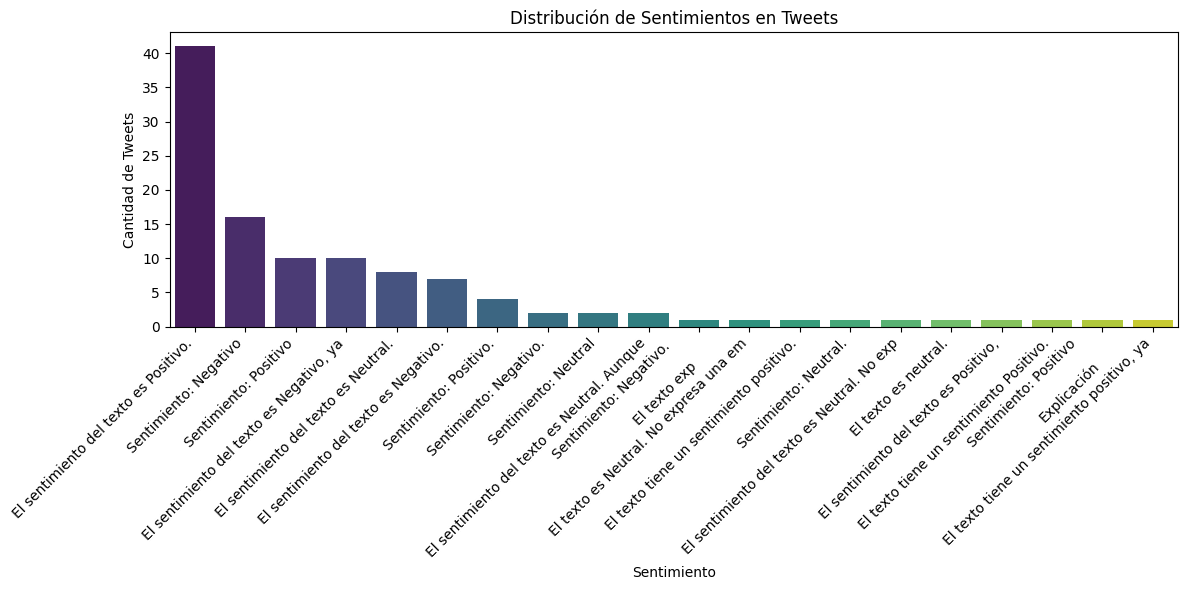

In [32]:
# Paso 6: Visualización de los resultados

# Contar la cantidad de tweets por sentimiento
conteo_sentimientos = df['Sentimiento'].value_counts()

# Crear un gráfico de barras para la distribución de sentimientos
plt.figure(figsize=(12,6))  # Aumentar el tamaño de la figura para dar más espacio

# Crear el gráfico
sns.barplot(x=conteo_sentimientos.index, y=conteo_sentimientos.values, hue=conteo_sentimientos.index, dodge=False, palette='viridis')

# Ajustar etiquetas y título
plt.title('Distribución de Sentimientos en Tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')

# Rotar las etiquetas del eje X para evitar superposición
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas a 45 grados

# Ajustar el layout para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

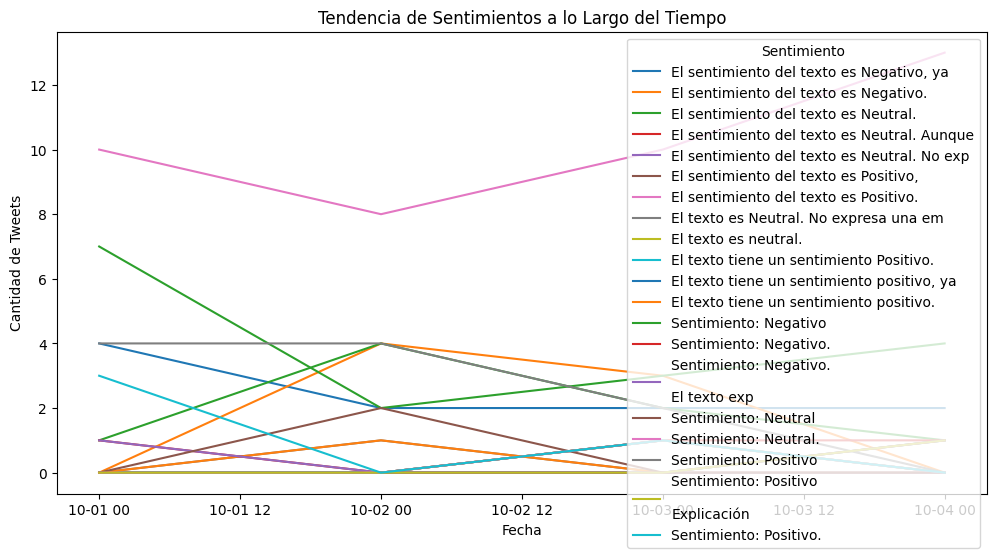

In [24]:
# Paso 7: Análisis temporal (si los datos incluyen fechas)

# Convertir la columna 'Fecha y Hora' a formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha y Hora'], format='%Y-%m-%d %I:%M %p')

# Agrupar por fecha y sentimiento
sentimiento_diario = df.groupby([df['Fecha'].dt.date, 'Sentimiento']).size().unstack(fill_value=0)

# Visualizar las tendencias de sentimiento a lo largo del tiempo
sentimiento_diario.plot(kind='line', figsize=(12,6))
plt.title('Tendencia de Sentimientos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.show()